In [20]:
import sqlite3
conn = sqlite3.connect("netflix_fixed.sqlite")
cursor = conn.cursor()

print("კავშირი ბაზასთან წარმატებით დამყარდა.")


კავშირი ბაზასთან წარმატებით დამყარდა.


In [21]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("📄 ცხრილები ბაზაში:")
for table in tables:
    print("-", table[0])



📄 ცხრილები ბაზაში:
- netflix_titles


In [22]:
cursor.execute("""
SELECT title, release_year, rating
FROM netflix_titles
WHERE type = 'Movie' AND release_year > 2020
""")
rows = cursor.fetchall()

print("2020 წლის შემდეგ გამოსული ფილმები:")
for row in rows:
    print(row)


2020 წლის შემდეგ გამოსული ფილმები:
('My Little Pony: A New Generation', 2021, 'PG')
('The Starling', 2021, 'PG-13')
('Je Suis Karl', 2021, 'TV-MA')
('Confessions of an Invisible Girl', 2021, 'TV-PG')
('Intrusion', 2021, 'TV-14')
('Go! Go! Cory Carson: Chrissy Takes the Wheel', 2021, 'TV-Y')
('Ankahi Kahaniya', 2021, 'TV-14')
('The Father Who Moves Mountains', 2021, 'TV-MA')
('The Stronghold', 2021, 'TV-MA')
('My Heroes Were Cowboys', 2021, 'PG')
('Nightbooks', 2021, 'TV-PG')
('Schumacher', 2021, 'TV-14')
('A StoryBots Space Adventure', 2021, 'TV-Y')
('You vs. Wild: Out Cold', 2021, 'TV-G')
('Little Singham - Black Shadow', 2021, 'TV-Y7')
('Tughlaq Durbar (Telugu)', 2021, 'TV-14')
('Firedrake the Silver Dragon', 2021, 'TV-Y7')
('Kate', 2021, 'R')
('Prey', 2021, 'TV-MA')
('Blood Brothers: Malcolm X & Muhammad Ali', 2021, 'PG-13')
('The Women and the Murderer', 2021, 'TV-14')
('JJ+E', 2021, 'TV-MA')
('Untold: Breaking Point', 2021, 'TV-MA')
('Worth', 2021, 'PG-13')
('Afterlife of the Part

In [24]:
title = input("შეიყვანე ფილმის სახელი: ")
year = int(input("გამოშვების წელი: "))
rating = input("რეიტინგი (მაგ: PG, TV-MA): ")

cursor.execute("INSERT INTO netflix_titles (title, release_year, rating, type) VALUES (?, ?, ?, 'Movie')",
               (title, year, rating))
conn.commit()

print("ფილმი დაემატა")


შეიყვანე ფილმის სახელი:  s
გამოშვების წელი:  2
რეიტინგი (მაგ: PG, TV-MA):  3


ფილმი დაემატა


In [25]:
old_title = input("რომელი ფილმის განახლება გინდა (ძველი სახელი): ")
new_title = input("შეიყვანე ახალი სახელი: ")

cursor.execute("UPDATE netflix_titles SET title = ? WHERE title = ?", (new_title, old_title))
conn.commit()

print("ფილმის სახელი განახლდა")


რომელი ფილმის განახლება გინდა (ძველი სახელი):  f
შეიყვანე ახალი სახელი:  3


ფილმის სახელი განახლდა


In [26]:
delete_title = input("რომელი ფილმი წაიშალოს? ")

cursor.execute("DELETE FROM netflix_titles WHERE title = ?", (delete_title,))
conn.commit()

print("ფილმი წაიშალა ცხრილიდან.")


რომელი ფილმი წაიშალოს?  g


ფილმი წაიშალა ცხრილიდან.


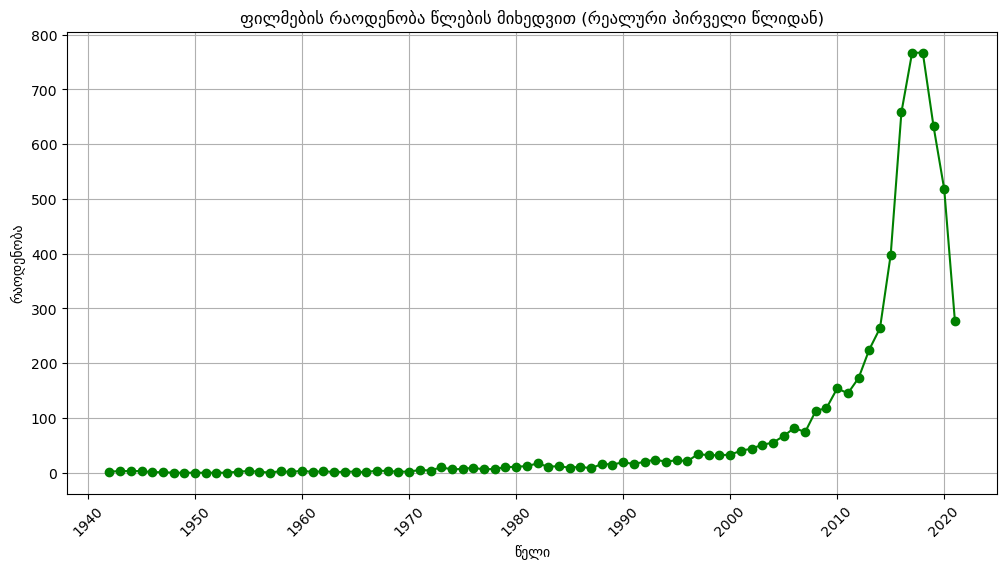

In [40]:
import matplotlib.pyplot as plt

cursor.execute("""
SELECT release_year, COUNT(*) FROM netflix_titles
WHERE type = 'Movie' AND release_year IS NOT NULL AND release_year > 1900
GROUP BY release_year
ORDER BY release_year ASC
""")
data = cursor.fetchall()

years = [int(x[0]) for x in data]
counts = [x[1] for x in data]

start_year = min(years)
end_year = max(years)
full_years = list(range(start_year, end_year + 1))
full_counts = [counts[years.index(y)] if y in years else 0 for y in full_years]

plt.figure(figsize=(12, 6))
plt.plot(full_years, full_counts, marker='o', color='green')
plt.title("ფილმების რაოდენობა წლების მიხედვით (რეალური პირველი წლიდან)")
plt.xlabel("წელი")
plt.ylabel("რაოდენობა")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


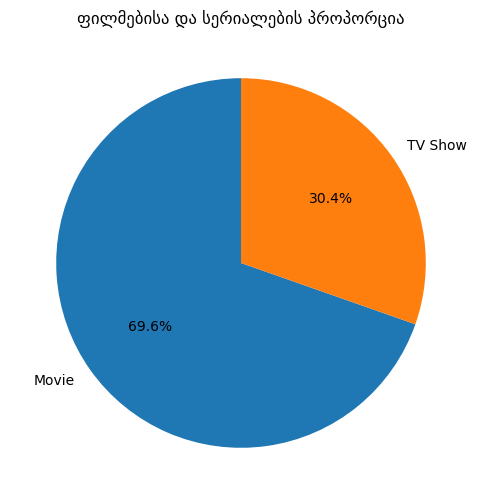

In [28]:
cursor.execute("""
SELECT type, COUNT(*) FROM netflix_titles
GROUP BY type
""")
data = cursor.fetchall()
labels = [x[0] for x in data]
sizes = [x[1] for x in data]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("ფილმებისა და სერიალების პროპორცია")
plt.show()

